# Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their
attributes such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more
than 10,000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same folder and run the following commmand to get it in the environment

## About the Dataset

### The ultimate Soccer database for data analysis and machine learning

<p>The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team
formations, with player names and a pair of coordinates to indicate their position on the pitch.</p>
<ul>
<li>+25,000 matches</li>
<li>+10,000 players</li>
<li>11 European Countries with their lead championship</li>
<li>Seasons 2008 to 2016</li>
<li>Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including
the weekly updates</li>
<li>Team line up with squad formation (X, Y coordinates)</li>
<li>Betting odds from up to 10 providers</li>
<li>Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches.</li>
</ul> 
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA
video games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

## Python skills required to complete this project
### SQL:
The data is in SQL database so students need to retrive using query language. They also need
to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.

SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring.
It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249.
You do not need to install this module separately because it is shipped by default along with Python
version 2.5.x onwards.
To use sqlite3 module, you must first create a connection object that represents the database
and then optionally you can create a cursor object, which will help you in executing all the SQL
statements.

### Pandas:
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use
data structures and data analysis tools for the Python programming language. Python with
Pandas is used in a wide range of fields including academic and commercial domains including
finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of
Python Pandas and how to use them in practice.
### Scikit Learn
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a
consistent interface in Python.
The library is built upon the SciPy (Scientific Python) that must be installed before you can
use scikit-learn. This stack that includes:
NumPy: Base n-dimensional array package
SciPy: Fundamental library for scientific computing
Matplotlib: Comprehensive 2D/3D plotting
IPython: Enhanced interactive console
Sympy: Symbolic mathematics
Pandas: Data structures and analysis
Extensions or modules for SciPy care conventionally named SciKits. As such, the module
provides learning algorithms and is named scikit-learn.
The vision for the library is a level of robustness and support required for use in production systems.
This means a deep focus on concerns such as easy of use, code quality, collaboration,
documentation and performance.

## Machine Learning skills required to complete the project
### Supervised learning
Supervised learning deals with learning a function from available training data. A supervised
learning algorithm analyzes the training data and produces an inferred function, which can be
used for mapping new examples.

### Regression
Regression is a parametric technique used to predict continuous (dependent) variable given a set
of independent variables. It is parametric in nature because it makes certain assumptions
(discussed next) based on the data set. If the data set follows those assumptions, regression gives
incredible results.
### Model evaluation
Student must know how to judge a model on unseen data. What metric to select to judge
the performance

# Let's get started.....

## Import Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
import seaborn as sns
from matplotlib import pyplot as plt

## Read Data from the Database into pandas

In [2]:
# Create your connection.

cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


# Preprocessing Data

In [4]:
df.shape

(183978, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

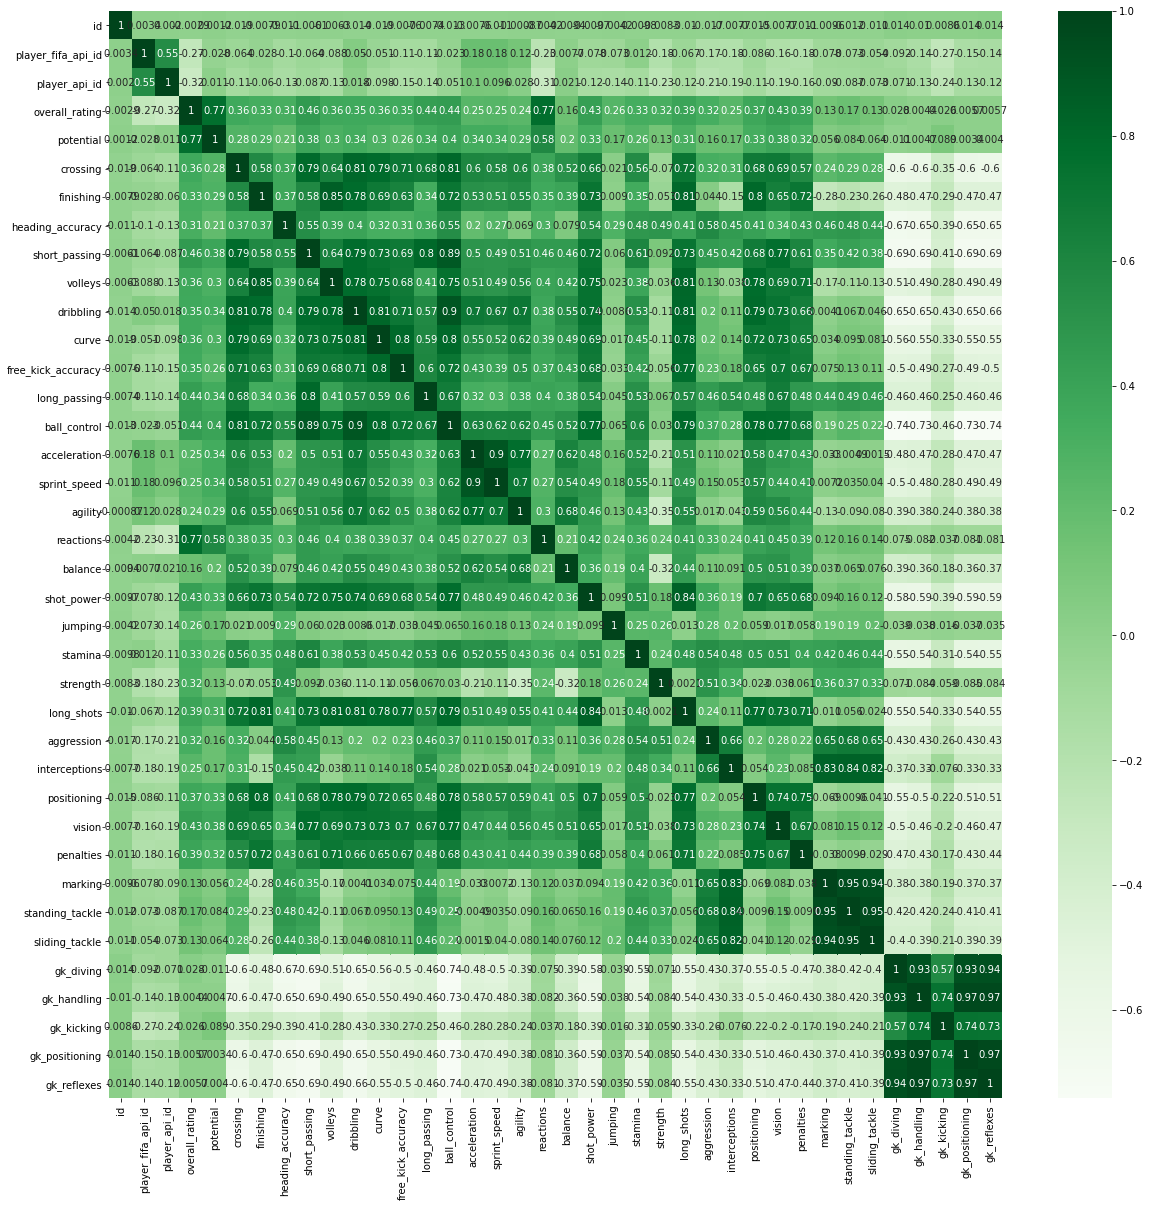

In [6]:
# Plotting a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Greens', annot=True)
plt.show()

In [7]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


## Some highly correlated feature plots

Text(0.5, 1.0, 'Marking vs Standing tackle')

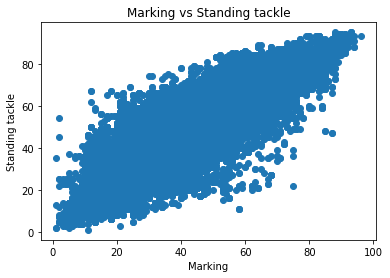

In [8]:
# PLotting some of the highly correlated features
plt.scatter(df['marking'], df['standing_tackle'])
plt.xlabel('Marking')
plt.ylabel('Standing tackle')
plt.title('Marking vs Standing tackle')

Text(0.5, 1.0, 'Potential vs Overall Rating')

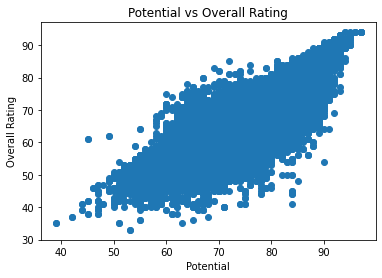

In [9]:
plt.scatter(df['potential'], df['overall_rating'])
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.title('Potential vs Overall Rating')

Text(0.5, 1.0, 'Reactions vs Overall Rating')

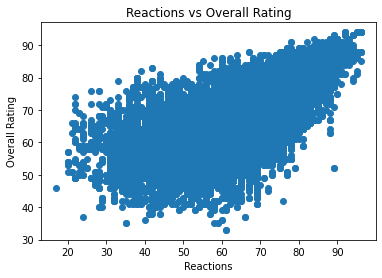

In [10]:
plt.scatter(df['reactions'], df['overall_rating'])
plt.xlabel('Reactions')
plt.ylabel('Overall Rating')
plt.title('Reactions vs Overall Rating')

In [11]:
# Checking for null values
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

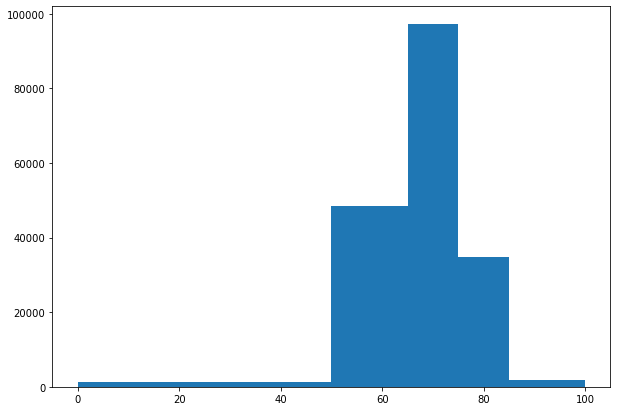

<AxesSubplot:ylabel='Density'>

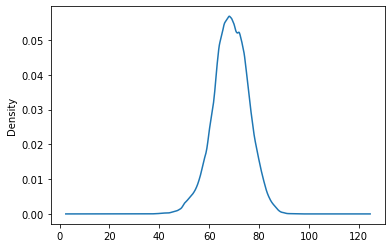

In [12]:
# Plotting a histogram to unerstand the distribution of overall ratings
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df['overall_rating'], bins = [0, 50, 65, 75, 85, 100]) 
plt.show()

df['overall_rating'].plot(kind='density')

In [13]:
# Most ratings vary between 50 and 90 maximum lying around 70 and 75

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

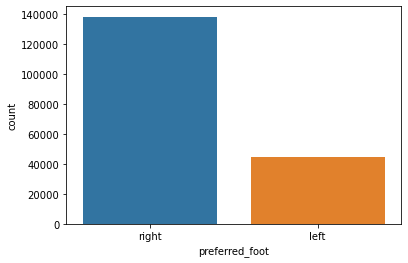

In [14]:
sns.countplot('preferred_foot', data=df)

In [15]:
# Most players prefer right foot

In [16]:
# Since there are 18000+ rows we will drop these 2713 rows rather than filling them since dataset is huge
df.dropna(inplace=True)

## Feature Engineering

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['preferred_foot'] = le.fit_transform(df['preferred_foot'])
df['attacking_work_rate'] = le.fit_transform(df['attacking_work_rate'])
df['defensive_work_rate'] = le.fit_transform(df['defensive_work_rate'])
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,1,4,14,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,1,4,14,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,1,4,14,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,1,4,14,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,1,4,14,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [18]:
# Since the overall rating does not depend on the player's id and date we will drop those columns
x = df.drop(['overall_rating', 'id', 'player_fifa_api_id', 'player_api_id', 'date'], axis=1)
y = df['overall_rating']

## Train Test Splitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modeling

In [20]:
# Using linear regression as the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
print(lr.score(X_test, y_test))

0.8437909649033096


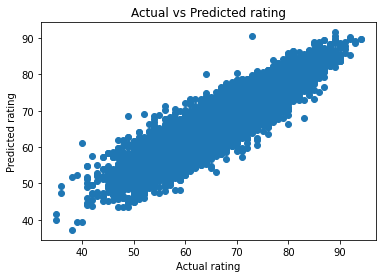

In [22]:
# Plot actual vs predicted rating
plt.scatter(y_test, y_pred)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.title("Actual vs Predicted rating")
plt.show()

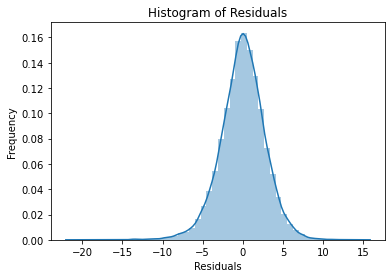

In [23]:
# Plotting the distribtion of errors
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, min_samples_leaf=8, random_state=1)
clf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=8, random_state=1)

<AxesSubplot:>

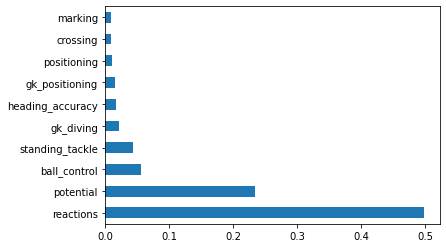

In [25]:
# Plotting the top 10 most important features to predict overall ratings
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [26]:
# Trying Decision tree regressor as the model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
regressor.score(X_test, y_test)

0.9645635280763156

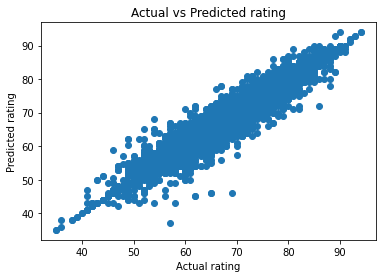

In [29]:
# Plotting actual vs predicted rating for decision tree regressor 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.title("Actual vs Predicted rating")
plt.show()

/home/shreya/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


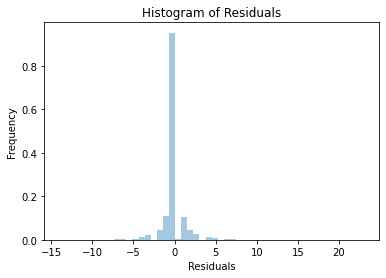

In [30]:
# Plotting the distribution of errors
sns.distplot(y_test - y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Results

In [36]:
# For regression problems the metrics used are r2 score, mean absolute error, mean squared error and rmse
from sklearn.metrics import *

# Evaluating test results
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9645635280763156
Mean Absolute Error: 0.5705364486178713
Mean Squared Error: 1.764234792063536
Root Mean Squared Error: 1.3282450045317453


In [40]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(regressor, X_train, y_train, cv=10)
print(cross)

[0.96064716 0.96171979 0.96030682 0.96152608 0.960334   0.96088747
 0.96039323 0.9611219  0.95888787 0.9598529 ]


In [41]:
cross_test = cross_val_score(regressor, X_test, y_test, cv=10)
print(cross_test)

[0.91323995 0.91015119 0.90707822 0.90545963 0.91051489 0.91089832
 0.90204853 0.90593139 0.90312535 0.90895117]


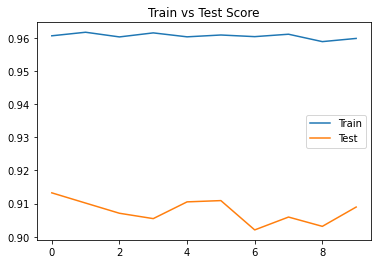

In [44]:
plt.plot(cross, label='Train')
plt.plot(cross_test, label='Test')
plt.title('Train vs Test Score')
plt.legend()

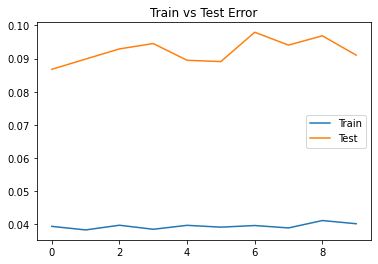

In [45]:
plt.plot(1 - cross, label='Train')
plt.plot(1 - cross_test, label='Test')
plt.title('Train vs Test Error')
plt.legend()